In [45]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import sympy
from sklearn.preprocessing import MinMaxScaler

# Caso 1: Senoide

In [83]:
v = 60 
m1 = 1
m2 = 2
y0 = 50
csi_eval = np.linspace(0.3,0.5,num=100) 
lamb = np.linspace(300e-3,500e-3,num=100)
Omega = np.linspace(0.000001,2.5,num=100)
omega = 2*np.pi*v/lamb
omega_n = omega/Omega

scaler = MinMaxScaler()

csi_list = [0.25,0.5,0.75,0.9]

Hmb = (1+(2*csi_eval*Omega)**2)**0.5/((1-Omega**2)**2+(2*csi_eval*Omega)**2)**0.5

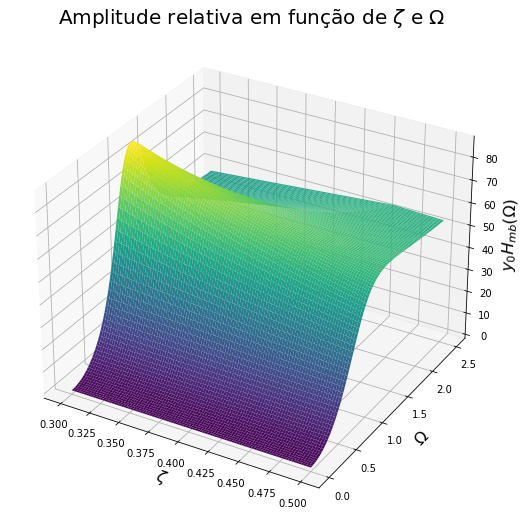

In [86]:
X, Y = np.meshgrid(csi_eval, Omega)

Hmb = (1+(2*X*Y)**2)**0.5/((1-Y**2)**2+(2*X*Y)**2)**0.5

psi = np.arctan((2*X*Y**3)/(1+(Y**2)*(4*X**2-1)))

y0Xy = y0*(Hmb**2-2*Hmb*np.cos(psi) + 1)**0.5

fig = plt.figure(figsize=[16,9])

ax = plt.axes(projection='3d')
    
ax.set_title('Amplitude relativa em função de $\zeta$ e $\Omega$'.format(csi),fontsize=20)
ax.set_ylabel('$\Omega$',fontsize=16)
ax.set_xlabel('$\zeta$',fontsize=16)
ax.set_zlabel('$y_0 H_{mb}(\Omega )$',fontsize=16)
    
ax.plot_surface(X, Y, y0Xy, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

ax.grid()

plt.show()
fig.savefig('amplitude_relativa__frequencia__fator_de_amortecimento.png', bbox_inches='tight')

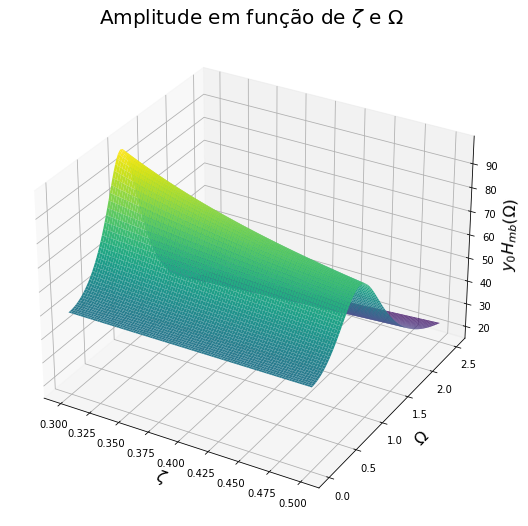

In [87]:
X, Y = np.meshgrid(csi_eval, Omega)

Z = y0 * (1+(2*X*Y)**2)**0.5/((1-Y**2)**2+(2*X*Y)**2)**0.5

fig = plt.figure(figsize=[16,9])

ax = plt.axes(projection='3d')
    
ax.set_title('Amplitude em função de $\zeta$ e $\Omega$'.format(csi),fontsize=20)
ax.set_ylabel('$\Omega$',fontsize=16)
ax.set_xlabel('$\zeta$',fontsize=16)
ax.set_zlabel('$y_0H_{mb}(\Omega )$',fontsize=16)
    
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

ax.grid()

plt.show()
fig.savefig('amplitude__frequencia__fator_de_amortecimento.png', bbox_inches='tight')

# Caso 1: Degrau

In [ ]:
X, Y = np.meshgrid(csi_eval, omega_n)

omega_d = Y(1-X)**0.5

phi = np.arctan((1-X**2)**0.5/(X))

Z = (2*X*y0)/(1-X**2)**0.5 * np.exp(-X*Y)

fig = plt.figure(figsize=[16,9])

ax = plt.axes(projection='3d')
    
ax.set_title('Amplitude em função de $\zeta$ e $\Omega$'.format(csi),fontsize=20)
ax.set_ylabel('$\Omega$',fontsize=16)
ax.set_xlabel('$\zeta$',fontsize=16)
ax.set_zlabel('$y_0H_{mb}(\Omega )$',fontsize=16)
    
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

ax.grid()

plt.show()
fig.savefig('amplitude__frequencia__fator_de_amortecimento.png', bbox_inches='tight')

# Misc

In [4]:
Omega_list = []

for csi in csi_list:
    p = np.poly1d([X_max, 0, (-2*X_max+4*X_max+csi**2-4*csi**2),0,X_max-1])

    rootsp = p.r

    for i in range(len(rootsp)):
        if rootsp[i].imag == 0:
            if rootsp[i].real >= 0:
                Omega_list.append(rootsp[i].real)

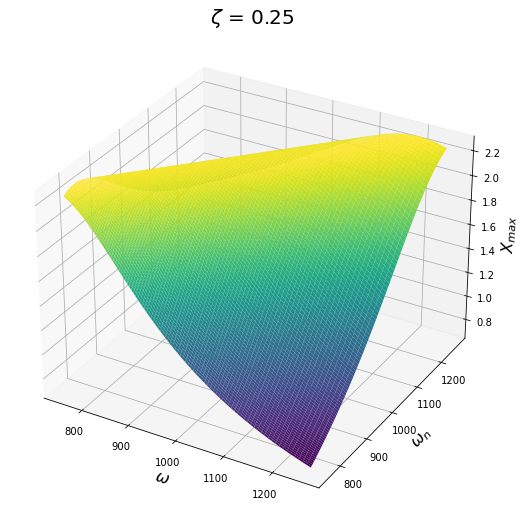

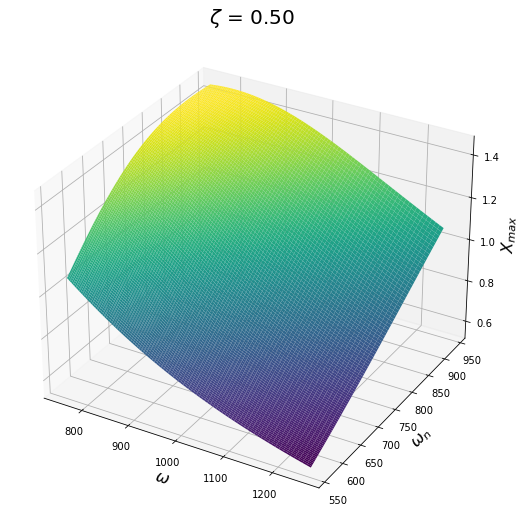

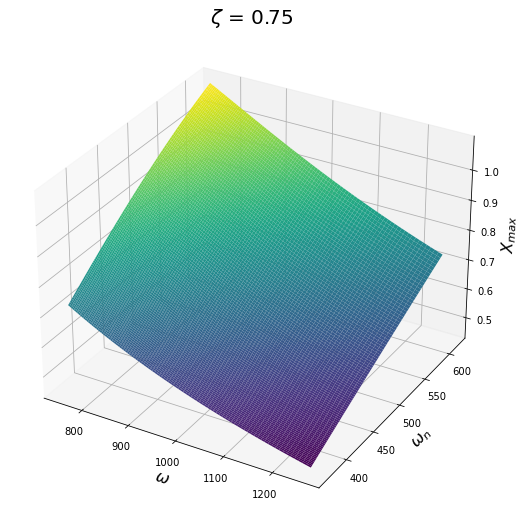

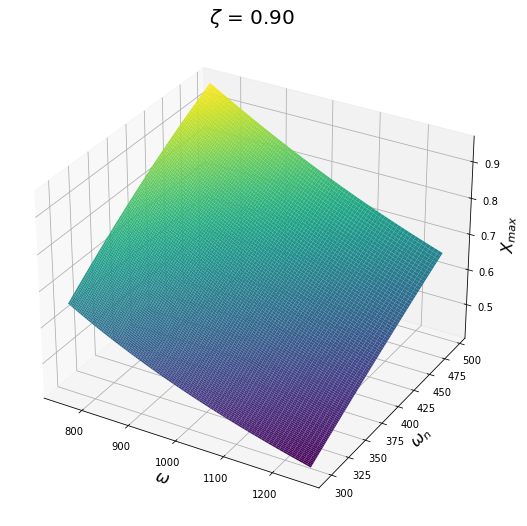

In [6]:
for csi,Omega in zip(csi_list,Omega_list):
    omega_n = omega/Omega

    X, Y = np.meshgrid(omega, omega_n)

    Z = (1+(2*csi*(X/Y))**2)**0.5/((1-(X/Y)**2)**2 + (2*csi*(X/Y))**2)**0.5

    fig = plt.figure(figsize=[16,9])

    ax = plt.axes(projection='3d')
    
    ax.set_title('$\zeta$ = {:.2f}'.format(csi),fontsize=20)
    ax.set_ylabel('$\omega _n$',fontsize=16)
    ax.set_xlabel('$\omega$',fontsize=16)
    ax.set_zlabel('$X_{max}$',fontsize=16)
    
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')

    ax.grid()

    plt.show()
    fig.savefig('omegaxomega_n_zeta_'+str(csi)+'.png', bbox_inches='tight')

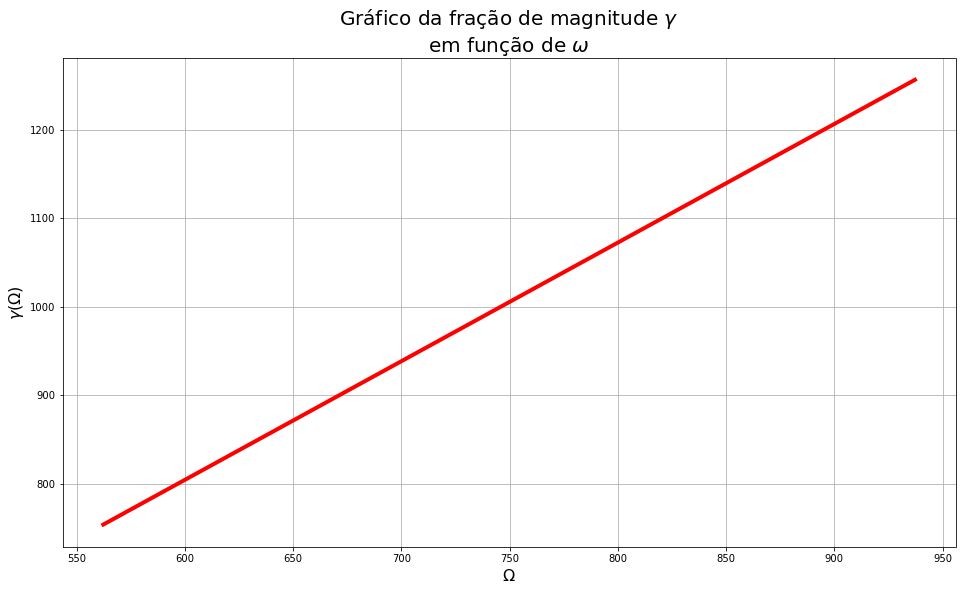

In [84]:
fig = plt.figure(figsize=[16,9])
ax = fig.subplots(1,1)

ax.set_ylabel('$\gamma (\Omega )$',fontsize=16)
ax.set_xlabel('$\Omega$',fontsize=16)
ax.set_title('Gráfico da fração de magnitude $\gamma$\nem função de $\omega$',fontsize=20)

ax.plot(omega_n,omega,'r',linewidth=4)

ax.grid()

plt.show()
fig.savefig('trabalho_10.png', bbox_inches='tight')

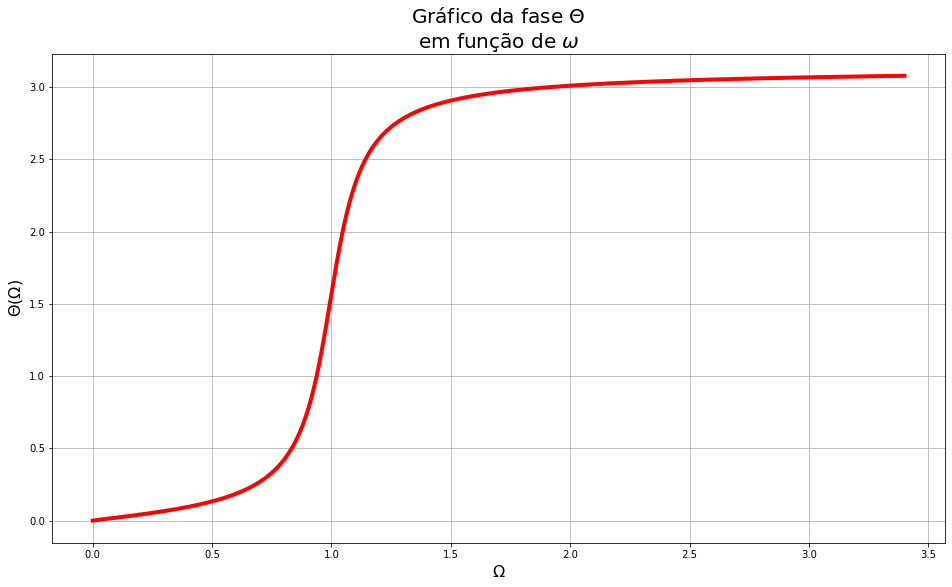

In [60]:
fig = plt.figure(figsize=[16,9])
ax = fig.subplots(1,1)

ax.set_ylabel('$\Theta (\Omega )$',fontsize=16)
ax.set_xlabel('$\Omega$',fontsize=16)
ax.set_title('Gráfico da fase $\Theta$\nem função de $\omega$',fontsize=20)

ax.plot(Omega,Theta_eval,'r',linewidth=4)

ax.grid()

plt.show()
fig.savefig('trabalho_10_2.png', bbox_inches='tight')